In [287]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [288]:
def read_data():
    df_sp = pd.read_csv('D:\data science MBA\project\ml stock price\^spx_d.csv')# s&p500 index (us stock market stock)
    df_unrate = pd.read_csv('D:\data science MBA\project\ml stock price\\UNRATE.csv').rename(columns={"DATE":"Date"})# نرخ بیکاری شهری
    df_usdx = pd.read_csv('D:\data science MBA\project\ml stock price\\USDX.csv')# شاخص دلار
    df_vix = pd.read_csv('D:\data science MBA\project\ml stock price\^VIX.csv')# نوسان ایندکس  در دوره 30روزه
    df_umcsent = pd.read_csv('D:\data science MBA\project\ml stock price\\UMCSENT.csv').rename(columns={"DATE":"Date"})# حس خوشبینی مشتریان به اقتصاد
    df_effr = pd.read_csv('D:\data science MBA\project\ml stock price\EFFR.csv').rename(columns={"DATE":"Date"})# نرخ بهره
    return  df_sp, df_unrate, df_usdx, df_vix, df_umcsent, df_effr
data=read_data()
data

(            Date     Open     High      Low    Close        Volume
 0     2009-01-02   902.99   934.73   899.35   931.80  2.249039e+09
 1     2009-01-05   929.17   936.63   919.53   927.45  3.007728e+09
 2     2009-01-06   931.17   943.85   927.28   934.70  2.995900e+09
 3     2009-01-07   927.45   927.45   902.37   906.65  2.613856e+09
 4     2009-01-08   905.73   910.00   896.81   909.73  2.773083e+09
 ...          ...      ...      ...      ...      ...           ...
 3861  2024-05-07  5187.20  5200.23  5178.96  5187.70  2.293459e+09
 3862  2024-05-08  5168.98  5191.95  5165.86  5187.67  2.107757e+09
 3863  2024-05-09  5189.03  5215.30  5180.41  5214.08  1.975552e+09
 3864  2024-05-10  5225.49  5239.66  5209.68  5222.68  1.878510e+09
 3865  2024-05-13  5233.08  5237.26  5211.16  5221.42  1.960171e+09
 
 [3866 rows x 6 columns],
            Date  UNRATE
 0    2009-01-01     7.8
 1    2009-02-01     8.3
 2    2009-03-01     8.7
 3    2009-04-01     9.0
 4    2009-05-01     9.4
 ..   

In [289]:
# df_sp
# df_unrate
# df_usdx
# df_vix
# df_umcsent
#df_effr.isnull().values.all()

In [290]:
def date_data(df):
   
    for file in df:
        
        file['Date']=pd.to_datetime(file['Date'])
        file=file.set_index('Date',inplace=True)
    return df
df_date=date_data(data)

In [291]:
def macro_economics(df):
  
    unrate = df[1].resample('D').ffill()
    usdx = df[2].drop(["Open","High","Low","Adj Close","Volume"],axis=1).rename(columns={"Close":"usdx"}).resample('D').ffill()
    vix = df[3].drop(["Open","High","Low","Adj Close","Volume"],axis=1).rename(columns={"Close":"vix"}).resample('D').ffill()
    umcsent = df[4].resample('D').ffill()
    effr = df[5].resample('D').ffill()

    return pd.concat([unrate,usdx,vix,umcsent,effr],axis=1)
df_macro=macro_economics(df_date)

In [292]:
def fill_missing():
    df_macro.fillna(method="ffill", inplace=True)
    df_macro.fillna(method="bfill", inplace=True)
    return df_macro
fbfill=fill_missing()

C:\Users\abakh\AppData\Local\Temp\ipykernel_4416\1282613022.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


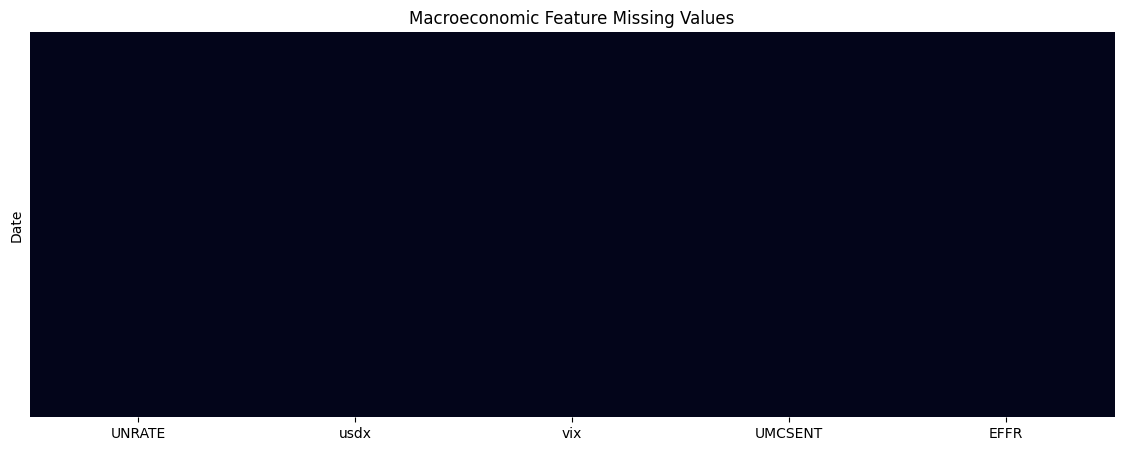

In [293]:
fig, axis = plt.subplots(1,1, figsize=(14,5))

sns.heatmap(fbfill.isnull(),
            cbar=False,
            cmap='rocket',
            yticklabels=False,
            ax=axis)

axis.set_title('Macroeconomic Feature Missing Values')
fig.show()

In [294]:
def concat(df1,df2):
    return pd.concat([df1, df2], axis=1)

concat=concat(df_date[0],df_macro)
#concat.sort_index(axis=0, ascending=False, inplace=True)


In [295]:
def drop_null(df):
    df=df.dropna()
    df.insert(0, 'ID', range(0, len(df)))
    
    return df
df_claen=drop_null(concat)

<function matplotlib.pyplot.show(close=None, block=None)>

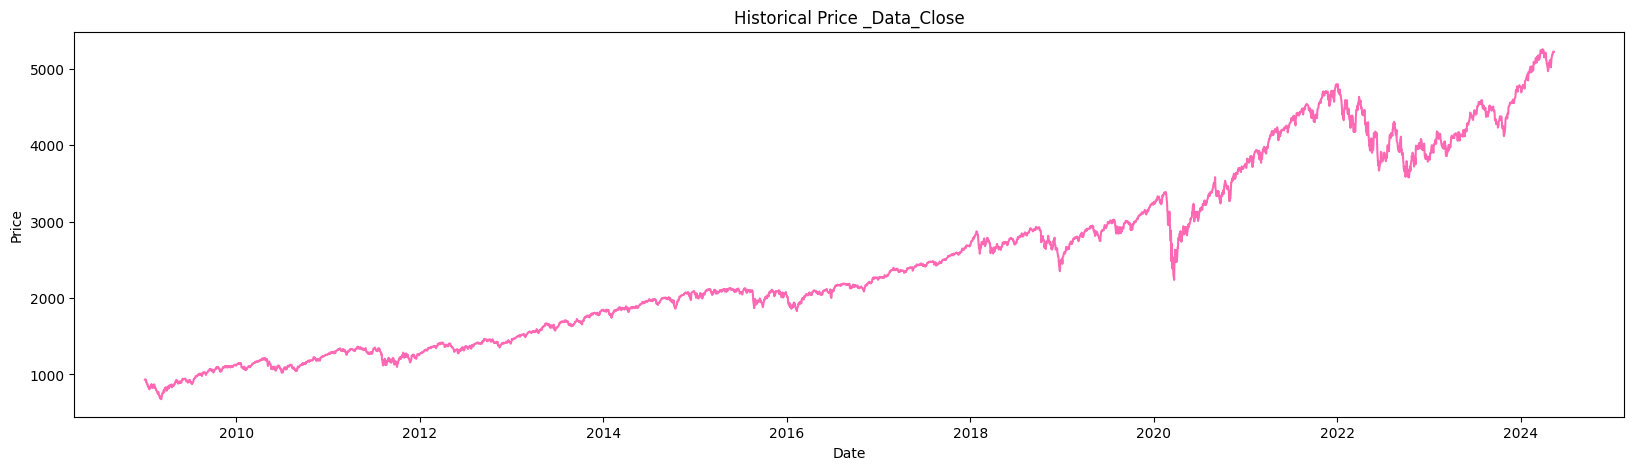

In [296]:
def line_chart(df):
    plt.figure(figsize=(20, 5))
    plt.plot(df.index,df['Close'],c = 'hotpink' )
    plt.title("Historical Price _Data_Close")
    plt.xlabel("Date")
    plt.ylabel("Price")
   
    return plt.show
line_chart(df_claen)

In [297]:
def scaler(df):
    df_close=df.filter(items=['Close'])
    df_return_price=df_close.pct_change().bfill()
    scale=MinMaxScaler(feature_range=(0,1))
    sc=scale.fit_transform(df_return_price)
    return scale , sc
scale ,sc=scaler(df_claen)

In [298]:
def test_train(df):

    train, test = train_test_split(df , test_size=0.33, random_state=1)
    return  train, test

train_data, test_data=test_train(sc)
length_train=len(train_data)
length_test=len(test_data)

In [299]:
def x_y_train(df):
    
    x_train=[]
    y_train=[]
    step=60# برای سوپروایز کردن دیتا و دراوردن ماتریس ایکس و وای که دارای 60 ستون و طول سطر منهای استپ باشد
    
    for i in range(step,length_train):
        x_train.append(df[i-step:i,0])
        y_train.append(df[i,0])
       
    return np.array(x_train),np.array(y_train)

x_tarin,y_train=x_y_train(sc)

x_train=np.reshape(x_tarin,(x_tarin.shape[0],x_tarin.shape[1],1))

In [300]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [301]:
#regressor=Sequential() سکوینشنال مربوط به کل مراحل است مه در اینجا سه لایه دارد به جز لایه ورودی
lstm_model = Sequential()

lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))#تعداد نورون ها برابر با 50 ، حالت برگشتی و شیپ ورودی
lstm_model.add(Dropout(0.2))# ضریب از کار انداختن نورون ها برای جلوگیری ازاور فیتینگ و حفظ کردن به جای یادگیری

lstm_model.add(LSTM(units=50, return_sequences=True))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(units=50, return_sequences=True))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(units=50))# لایه آخر
lstm_model.add(Dropout(0.2))

lstm_model.add(Dense(1))#  با یک نورون لایه خروچی 

lstm_model.compile(optimizer="adam", loss= "mean_squared_error")# چون مدال از نوع رگرسور است خطا ام اس ای است

lstm_model.fit(x_tarin,y_train ,epochs=100 , batch_size=30)

Epoch 1/100
85/85 [==============================] - 8s 42ms/step - loss: 0.0193
Epoch 2/100
85/85 [==============================] - 4s 43ms/step - loss: 0.0049
Epoch 3/100
85/85 [==============================] - 4s 43ms/step - loss: 0.0045
Epoch 4/100
85/85 [==============================] - 4s 43ms/step - loss: 0.0043
Epoch 5/100
85/85 [==============================] - 4s 43ms/step - loss: 0.0043
Epoch 6/100
85/85 [==============================] - 4s 43ms/step - loss: 0.0041
Epoch 7/100
85/85 [==============================] - 4s 43ms/step - loss: 0.0038
Epoch 8/100
85/85 [==============================] - 4s 43ms/step - loss: 0.0037
Epoch 9/100
85/85 [==============================] - 4s 43ms/step - loss: 0.0037
Epoch 10/100
85/85 [==============================] - 4s 43ms/step - loss: 0.0036
Epoch 11/100
85/85 [==============================] - 4s 43ms/step - loss: 0.0036
Epoch 12/100
85/85 [==============================] - 4s 43ms/step - loss: 0.0036
Epoch 13/100
85/85 [=====

In [302]:
scaler=pd.DataFrame(sc)
df_test=pd.DataFrame(test_data)
input=scaler[len(scaler)-len(df_test)-60:].values
input=input.reshape(-1,1)
# scale=MinMaxScaler(feature_range=(0,1))
# input=scale.fit_transform(input)

In [317]:
input.shape

(1336, 1)

In [303]:
def test_data(df):
    x_test=[]
    step=60
  
    for i in range(step,df.shape[0]):
        x_test.append(df[i-step:i,0])
         
    return np.array(x_test)

x_test=test_data(input)

x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [309]:
predicted_close_price = lstm_model.predict(x_test)

#predicted_close_price=scale.inverse_transform(predicted_close_price)
predicted_close_price


40/40 [==============================] - 1s 16ms/step


array([[0.55950266],
       [0.55950344],
       [0.5595039 ],
       ...,
       [0.55948496],
       [0.55948496],
       [0.5594861 ]], dtype=float32)

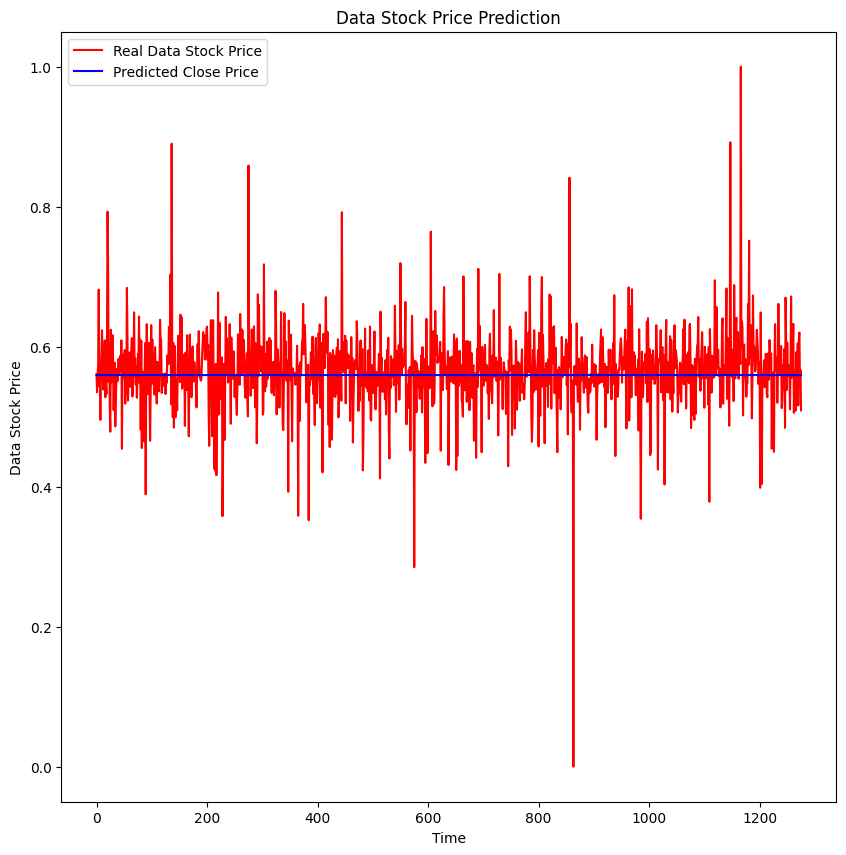

In [315]:
plt.figure(figsize=(10,10))

plt.plot(df_test,color="red",label="Real Data Stock Price")
plt.plot(predicted_close_price,color="blue",label="Predicted Close Price")
plt.title("Data Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Data Stock Price")
plt.legend()
plt.show()